# An example of using EASYMORE with rotated Latitude and Longitude (every grid has it own lat and lon)
## Remapping of CONUS WRF to subbasins of South Saskatchewan River at Medicine Hat, Alberta, Canada.

In [1]:
# loading EASYMORE
from easymore.easymore import easymore

# initializing EASYMORE object
esmr = easymore()

# specifying EASYMORE objects
# name of the case; the temporary, remapping and remapped file names include case name
esmr.case_name                = 'RDRS_Medicine_Hat'
# temporary path that the EASYMORE generated GIS files and remapped file will be saved
esmr.temp_dir                 = '../../temporary/'
# name of target shapefile that the source netcdf files should be remapped to
esmr.target_shp               = '../../data/target_shapefiles/South_Saskatchewan_MedicineHat.shp'
# esmr.target_shp_ID            = 'COMID'
# name of netCDF file(s); multiple files can be specified with *
esmr.source_nc                = '../../data/Source_nc_RDRS/rdrsv2.1_2000062112_original.nc' #rdrsv2.1_1980010112_slice.nc'
# name of variables from source netCDF file(s) to be remapped
esmr.var_names                = ['RDRS_v2.1_P_TT_1.5m']
# name of variable longitude in source netCDF files
esmr.var_lon                  = 'lon'
# name of variable latitude in source netCDF files
esmr.var_lat                  = 'lat'
# name of variable time in source netCDF file; should be always time
esmr.var_time                 = 'time'
# location where the remapped netCDF file will be saved
esmr.output_dir               = '../../output/'
# format of the variables to be saved in remapped files,
# if one format provided it will be expanded to other variables
esmr.format_list              = ['f4']
# fill values of the variables to be saved in remapped files,
# if one value provided it will be expanded to other variables
esmr.fill_value_list          = ['-9999.00']


# execute EASYMORE
esmr.nc_remapper()

EASYMORE version 0.0.3 is initiated.
no author name is provide and the author name is changed to (author name)!
EASYMORE is given multiple varibales to be remapped but only on format and fill valueEASYMORE repeat the format and fill value for all the variables in output files
EASYMORE will remap variable  RDRS_v2.1_P_UVC_10m  from source file to variable  RDRS_v2.1_P_UVC_10m  in remapped NeCDF file
EASYMORE will remap variable  RDRS_v2.1_P_FI_SFC  from source file to variable  RDRS_v2.1_P_FI_SFC  in remapped NeCDF file
EASYMORE will remap variable  RDRS_v2.1_P_FB_SFC  from source file to variable  RDRS_v2.1_P_FB_SFC  in remapped NeCDF file
EASYMORE will remap variable  RDRS_v2.1_A_PR0_SFC  from source file to variable  RDRS_v2.1_A_PR0_SFC  in remapped NeCDF file
EASYMORE will remap variable  RDRS_v2.1_P_P0_SFC  from source file to variable  RDRS_v2.1_P_P0_SFC  in remapped NeCDF file
EASYMORE will remap variable  RDRS_v2.1_P_TT_1.5m  from source file to variable  RDRS_v2.1_P_TT_1.5m  in

/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


EASYMORE detects that target shapefile is in WGS84 (epsg:4326)
EASYMORE detects that no field for ID is provided in sink/target shapefile
arbitarary values of ID are added in the field ID_t
EASYMORE detects that either of the fields for latitude or longitude is not provided in sink/target shapefile
calculating centroid of shapes in WGS84 projection;
for better appximation use the easymore equal area centroid function to preprocess target shapefile
EASYMORE detects that no field for latitude is provided in sink/target shapefile
latitude values are added in the field lat_t
EASYMORE detects that no field for longitude is provided in sink/target shapefile
longitude values are added in the field lon_t


/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/geopandas/_vectorized.py:150: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  out[:] = [_pygeos_to_shapely(geom) for geom in data]
/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/geopandas/_vectorized.py:150: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'MultiPolygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  out[:] = [_pygeos_to_shapely(geom) for geom in data]


it seems everything is OK with the sink/target shapefile; added to EASYMORE object target_shp_gpd
EASYMORE will save standard shapefile for EASYMORE claculation as:
../../temporary/RDRS_Medicine_Hat_target_shapefile.shp
EASYMORE detects that the varibales from the netCDF files are identicalin dimensions of the varibales and latitude and longitude
EASYMORE detects that all the varibales have dimensions of:
['time', 'rlat', 'rlon']
EASYMORE detects that the longitude varibales has dimensions of:
['rlat', 'rlon']
EASYMORE detects that the latitude varibales has dimensions of:
['rlat', 'rlon']
EASYMORE detects case 2 - rotated lat/lon
359.8900604248047


SystemExit: The difference between grid latitude and longitude are more than tolerance. This means that the adjacent grid may have jump in lon for example from -180 to +180. It is best to Adjust the lat lon varibale in the netcdf file and then apply EASYMORE to the amended netcdf.

/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3449: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [10]:
# loading EASYMORE
from easymore.easymore import easymore
import xarray as xr
import glob
import numpy as np

# initializing EASYMORE object
esmr = easymore()

esmr.source_nc     =  '../../data/Source_nc_RDRS/rdrsv2.1_2000062112_original.nc'
esmr.var_lon       =  'lon'

#
file_names = sorted(glob.glob(esmr.source_nc))

for file_name in file_names:
    ds = xr.open_dataset(file_name)
    lon = np.array(ds[esmr.var_lon])
    idx = np.where(lon>90)
    lon[idx] = lon [idx] - 360
    ds[esmr.var_lon].values = lon
    ds.to_netcdf(file_name+'_lon_corrected')


EASYMORE version 0.0.3 is initiated.


In [11]:
# loading EASYMORE
from easymore.easymore import easymore

# initializing EASYMORE object
esmr = easymore()

# specifying EASYMORE objects
# name of the case; the temporary, remapping and remapped file names include case name
esmr.case_name                = 'RDRS_Medicine_Hat'
# temporary path that the EASYMORE generated GIS files and remapped file will be saved
esmr.temp_dir                 = '../../temporary/'
# name of target shapefile that the source netcdf files should be remapped to
esmr.target_shp               = '../../data/target_shapefiles/South_Saskatchewan_MedicineHat.shp'
# esmr.target_shp_ID            = 'COMID'
# name of netCDF file(s); multiple files can be specified with *
esmr.source_nc                = '../../data/Source_nc_RDRS/rdrsv2.1_2000062112_original.nc_lon_corrected' #rdrsv2.1_1980010112_slice.nc'
# name of variables from source netCDF file(s) to be remapped
esmr.var_names                = ['RDRS_v2.1_P_TT_1.5m']
# name of variable longitude in source netCDF files
esmr.var_lon                  = 'lon'
# name of variable latitude in source netCDF files
esmr.var_lat                  = 'lat'
# name of variable time in source netCDF file; should be always time
esmr.var_time                 = 'time'
# location where the remapped netCDF file will be saved
esmr.output_dir               = '../../output/'
# format of the variables to be saved in remapped files,
# if one format provided it will be expanded to other variables
esmr.format_list              = ['f4']
# fill values of the variables to be saved in remapped files,
# if one value provided it will be expanded to other variables
esmr.fill_value_list          = ['-9999.00']


# execute EASYMORE
esmr.nc_remapper()

EASYMORE version 0.0.3 is initiated.
no author name is provide and the author name is changed to (author name)!
EASYMORE is given multiple varibales to be remapped but only on format and fill valueEASYMORE repeat the format and fill value for all the variables in output files
EASYMORE will remap variable  RDRS_v2.1_P_UVC_10m  from source file to variable  RDRS_v2.1_P_UVC_10m  in remapped NeCDF file
EASYMORE will remap variable  RDRS_v2.1_P_FI_SFC  from source file to variable  RDRS_v2.1_P_FI_SFC  in remapped NeCDF file
EASYMORE will remap variable  RDRS_v2.1_P_FB_SFC  from source file to variable  RDRS_v2.1_P_FB_SFC  in remapped NeCDF file
EASYMORE will remap variable  RDRS_v2.1_A_PR0_SFC  from source file to variable  RDRS_v2.1_A_PR0_SFC  in remapped NeCDF file
EASYMORE will remap variable  RDRS_v2.1_P_P0_SFC  from source file to variable  RDRS_v2.1_P_P0_SFC  in remapped NeCDF file
EASYMORE will remap variable  RDRS_v2.1_P_TT_1.5m  from source file to variable  RDRS_v2.1_P_TT_1.5m  in

/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/geopandas/_vectorized.py:150: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  out[:] = [_pygeos_to_shapely(geom) for geom in data]
/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/geopandas/_vectorized.py:150: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'MultiPolygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  out[:] = [_pygeos_to_shapely(geom) for geom in data]


it seems everything is OK with the sink/target shapefile; added to EASYMORE object target_shp_gpd
EASYMORE will save standard shapefile for EASYMORE claculation as:
../../temporary/RDRS_Medicine_Hat_target_shapefile.shp
EASYMORE detects that the varibales from the netCDF files are identicalin dimensions of the varibales and latitude and longitude
EASYMORE detects that all the varibales have dimensions of:
['time', 'rlat', 'rlon']
EASYMORE detects that the longitude varibales has dimensions of:
['rlat', 'rlon']
EASYMORE detects that the latitude varibales has dimensions of:
['rlat', 'rlon']
EASYMORE detects case 2 - rotated lat/lon
0.95245361328125
EASYMORE detects that lat lon variable are smooth and will create the source shapefile
EASYMORE is creating the shapefile from the netCDF file and saving it here:
../../temporary/RDRS_Medicine_Hat_source_shapefile.shp
EASYMORE detects that shapefile longitude is between -180 and 180, no correction is performed
inside shp_lon_correction, no cr

/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1638: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  result[:] = values
/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/geopandas/_vectorized.py:150: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  out[:] = [_pygeos_to_shapely(geom) for geom in data]
/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/pandas/core/dtypes/cast.py

------REMAPPING------
netcdf output file will be compressed at level 4
Remapping ../../data/Source_nc_RDRS/rdrsv2.1_2000062112_original.nc_lon_corrected to ../../output/RDRS_Medicine_Hat_remapped_2000-06-21-13-00-00.nc
Started at date and time 2022-07-27 19:10:26.849154
Ended   at date and time 2022-07-27 19:10:31.364179
------


--------------
--------------
# Visualization of the source and the results

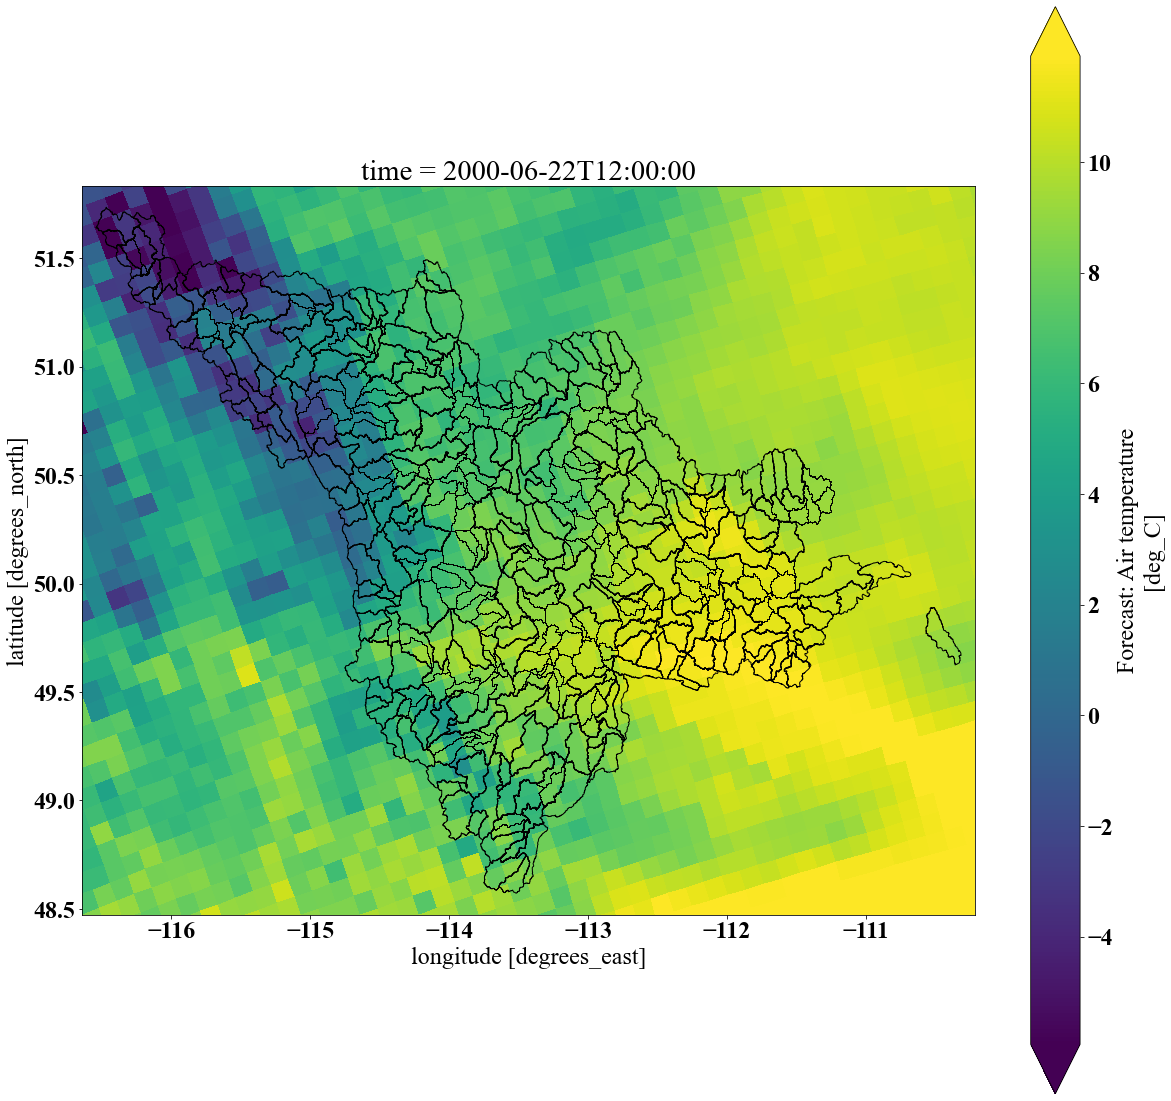

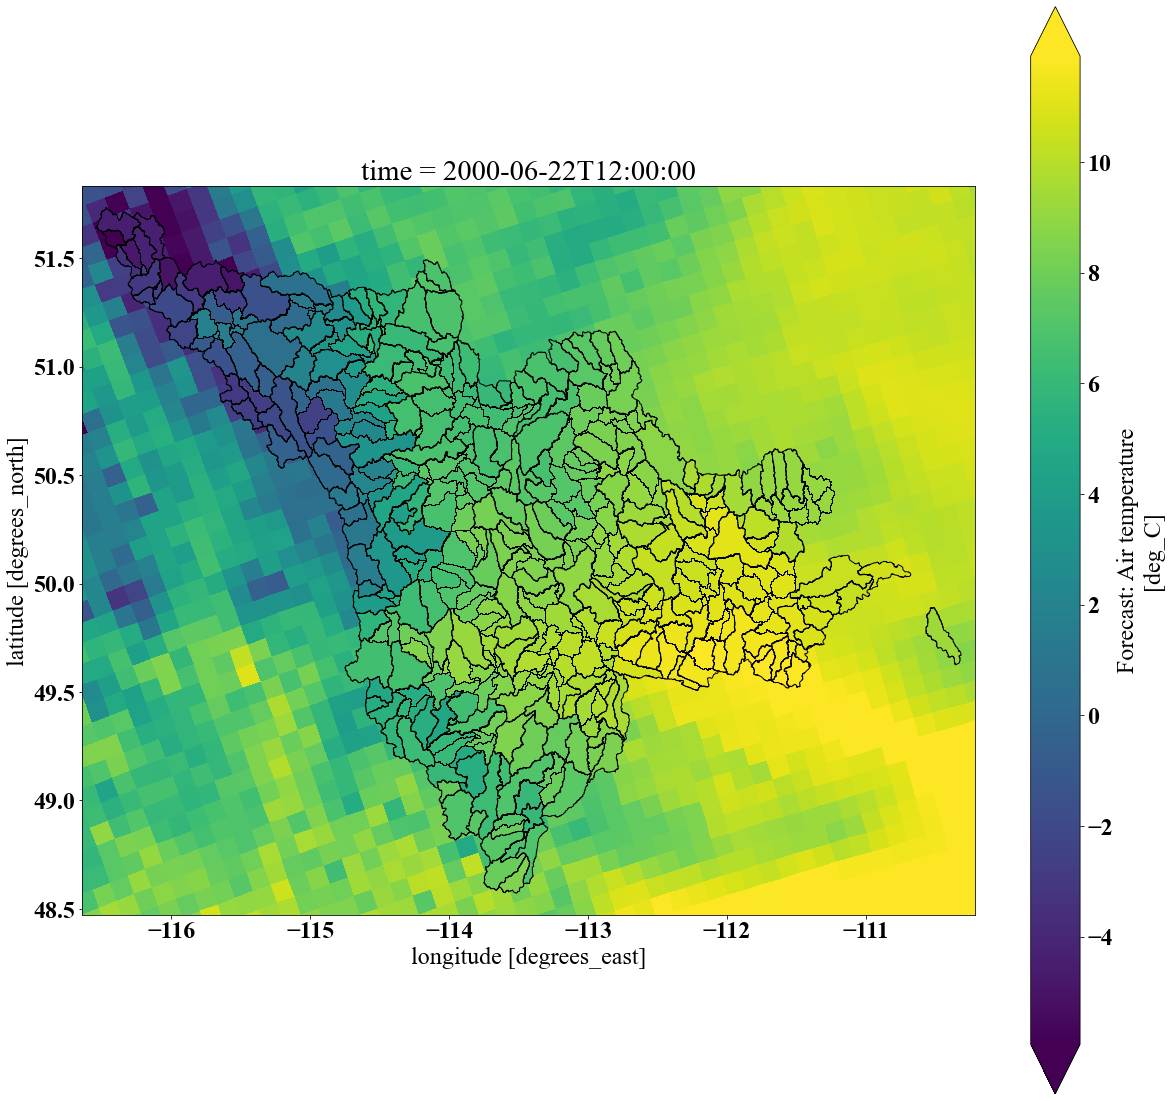

In [12]:
# load the packages
import xarray as xr
from matplotlib import pyplot as plt
import geopandas as gpd
import pandas as pd
import matplotlib
import os
import numpy as np
from datetime import datetime
import sys
font = {'family' : 'Times New Roman',
         'weight' : 'bold',
         'size'   : 24}
matplotlib.rc('font', **font)


# varibales to visualize
source_file_name                = '../../data/Source_nc_RDRS/rdrsv2.1_2000062112_original.nc_lon_corrected'
source_file_dimension_lon       = "lon"
source_file_dimension_lat       = "lat"
remapped_file_name              = '../../output/RDRS_Medicine_Hat_remapped_2000-06-21-13-00-00.nc'
varibale_name_in_source_file    = 'RDRS_v2.1_P_TT_1.5m'
varibale_name_in_remapped_file  = 'RDRS_v2.1_P_TT_1.5m'
variable_time_in_source_file    = 'time'
variable_time_in_remapped_file  = 'time'
#shp_target_name                 = '../../temporary/WRF_Medicine_Hat_source_shapefile.shp'
shp_target_name                 = esmr.temp_dir+ esmr.case_name + '_target_shapefile.shp'
time_step_of_viz                = '2000-10-01 10:00:00' # it should be in form of 1990-02-01 00:00:00 
#shp_target = gpd.read_file(esmr.temp_dir+ esmr.case_name + '_target_shapefile.shp') # load the target shapefile
location_save_fig               = '../../fig/'
cmap                            = 'viridis'
margin                          = 0.1 #degree
linewidth                       = 1
add_colorbar                    = True
target_shp_ID                   = 'ID_t'
remapped_var_id                 = 'ID'
min_lon,min_lat,max_lon,max_lat = None, None, None, None #


#
if not os.path.isdir(location_save_fig):
    os.mkdir(location_save_fig)

# get the time step in the source netcdf file
ds_source = xr.open_dataset(source_file_name) # source
ds_remapped = xr.open_dataset(remapped_file_name) # the remap of above
# check if the times are identical in source and remapped
if not ds_source[variable_time_in_source_file].equals(ds_remapped[variable_time_in_remapped_file]):
    sys.exit('The source and remapped files seems to have different time; make sure '+\
             'the remapped files is from the same source file.')
# get the step for the remapped
date = pd.DatetimeIndex(ds_source[variable_time_in_source_file].dt.strftime('%Y-%m-%d %H:%M:%S'))
df = pd.DataFrame(np.arange(len(date)),
                  columns=["step"],
                  index=date)
df = df.iloc[df.index.get_loc(datetime.strptime(time_step_of_viz,\
                                                '%Y-%m-%d %H:%M:%S'),method='nearest')]
step = df['step'].item()

# load the data and get the max and min values of remppaed file for the taarget variable
max_value = ds_remapped[varibale_name_in_remapped_file][step].max().item() # get the max of remapped
min_value = ds_remapped[varibale_name_in_remapped_file][step].min().item() # get the min of remapped


#
shp_target = gpd.read_file(shp_target_name) # load the target shapefile
if (min_lon is None) or (min_lat is None) or (max_lon is None) or (max_lat is None):
    min_lon, min_lat, max_lon, max_lat = shp_target.total_bounds


# first figure the source
fig, ax = plt.subplots(figsize=(20, 20))
ds_source[varibale_name_in_source_file][step].plot.pcolormesh(x=source_file_dimension_lon,
                                                              y=source_file_dimension_lat,
                                                              add_colorbar=add_colorbar,
                                                              ax = ax,
                                                              cmap=cmap,
                                                              vmin=min_value,
                                                              vmax=max_value)
shp_target.geometry.boundary.plot(color=None,edgecolor='k',linewidth = linewidth, ax = ax)
plt.ylim([min_lat-margin,max_lat+margin])
plt.xlim([min_lon-margin,max_lon+margin])
plt.savefig(location_save_fig+'test1.pdf')


# second figure remapped
fig, ax = plt.subplots(figsize=(20, 20))
ds_source[varibale_name_in_source_file][step].plot.pcolormesh(x=source_file_dimension_lon,
                                                              y=source_file_dimension_lat,
                                                              add_colorbar=add_colorbar,
                                                              ax = ax,
                                                              cmap=cmap,
                                                              vmin=min_value,
                                                              vmax=max_value)

# dataframe
df = pd.DataFrame()
df ['ID'] = ds_remapped[remapped_var_id][:]
df ['value'] = ds_remapped[varibale_name_in_remapped_file][step]
df = df.sort_values(by=['ID'])
df = df.reset_index(drop=True)

# shapefile
shp_target = shp_target[shp_target[target_shp_ID].isin(df[remapped_var_id])]
shp_target = shp_target.sort_values(by=[target_shp_ID])
shp_target = shp_target.reset_index(drop=True)

#
shp_target ['value'] = df ['value']
shp_target.plot(column= 'value',
                edgecolor='k',
                linewidth = linewidth,
                ax = ax,
                vmin=min_value,
                vmax=max_value)#, legend=True)
plt.ylim([min_lat-margin,max_lat+margin])
plt.xlim([min_lon-margin,max_lon+margin])
plt.savefig(location_save_fig+'test2.pdf')


